<a href="https://colab.research.google.com/github/kyle-walden/South-African-Fuel-Price-Analysis-Generalised-Additive-Model-/blob/master/Copy_of_Fuel_price_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Fuel_Transactions_by_Brand_za.xlsx')

In [0]:
df['PPL'] = df['Amount'] / df['Quantity']

In [0]:
diesel = df[df['Fuel Indicator Description'] == 'Diesel']
petrol = df[df['Fuel Indicator Description'] == 'Petrol']

In [0]:
# converting type of columns to 'category'
diesel['Brand Description'] = diesel['Brand Description'].astype('category')
# Assigning numerical values and storing in another column
diesel['Brand_Cat'] = diesel['Brand Description'].cat.codes

diesel['Merchant Name'] = diesel['Merchant Name'].astype('category')
# Assigning numerical values and storing in another column
diesel['Merchant_Name_Cat'] = diesel['Merchant Name'].cat.codes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [0]:
diesel.drop_duplicates(subset=['Transaction Date'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
df.head()

,Cost Centre Name,Registration No.,Driver Name,Cycle End Date,Brand Description,Merchant Type Description,Fuel Indicator Description,Transaction Date,Merchant Name,Odo Reading,Quantity,Amount,PPL
0,HIB,006KEWFS,POOL,2017-09-30,CALTEX,JOHANNESBURG,Diesel,2017-09-26,HIBBERDENE SERVICE STATION CC,537747,45.14,584.62,12.951263
1,HIB,006KEWFS,POOL,2018-02-28,CALTEX,JOHANNESBURG,Diesel,2018-02-05,HIBBERDENE SERVICE STATION CC,544378,65.43,916.02,14.000000
2,HIB,006KEWFS,POOL,2018-02-28,CALTEX,JOHANNESBURG,Diesel,2018-02-08,HIBBERDENE SERVICE STATION CC,544835,62.01,857.66,13.830995
3,HIB,006KEWFS,POOL,2019-04-29,CALTEX,JOHANNESBURG,Diesel,2019-04-02,HIBBERDENE SERVICE STATION CC,568953,49.97,769.04,15.390034
4,HIB,006KEWFS,POOL,2019-12-31,CALTEX,JOHANNESBURG,Diesel,2019-12-09,HIBBERDENE SERVICE STATION CC,585680,66.21,1052.74,15.900015


In [0]:
print(diesel[['Brand_Cat','PPL']].corr()) #does brand name affect price
print(diesel[['Merchant_Name_Cat','PPL']].corr()) #does location affect price 

           Brand_Cat       PPL
Brand_Cat   1.000000 -0.079709
PPL        -0.079709  1.000000
                   Merchant_Name_Cat     PPL
Merchant_Name_Cat             1.0000 -0.0262
PPL                          -0.0262  1.0000


In [0]:
diesel.sort_values(by=['Transaction Date'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
diesel['Transaction Date'].describe() #frequency indicates that there is daily recordings of PPL

count                     928
unique                    928
top       2017-10-30 00:00:00
freq                        1
first     2017-09-21 00:00:00
last      2020-04-06 00:00:00
Name: Transaction Date, dtype: object

In [0]:
diesel = diesel[['Transaction Date', 'PPL']]
diesel.head()

,Transaction Date,PPL
11,2017-09-21,13.600000
864,2017-09-22,12.680895
899,2017-09-23,13.079777
1372,2017-09-24,11.606154
9,2017-09-25,13.369836


In [0]:
import altair as alt
alt.Chart(diesel).mark_line().encode(
  x='Transaction Date',
  y='PPL',
).interactive(bind_y=False)

alt.Chart(...)

In [0]:
diesel.rename(columns={"Transaction Date": "ds", "PPL":"y"}, inplace=True)

In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet()
m.fit(diesel)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


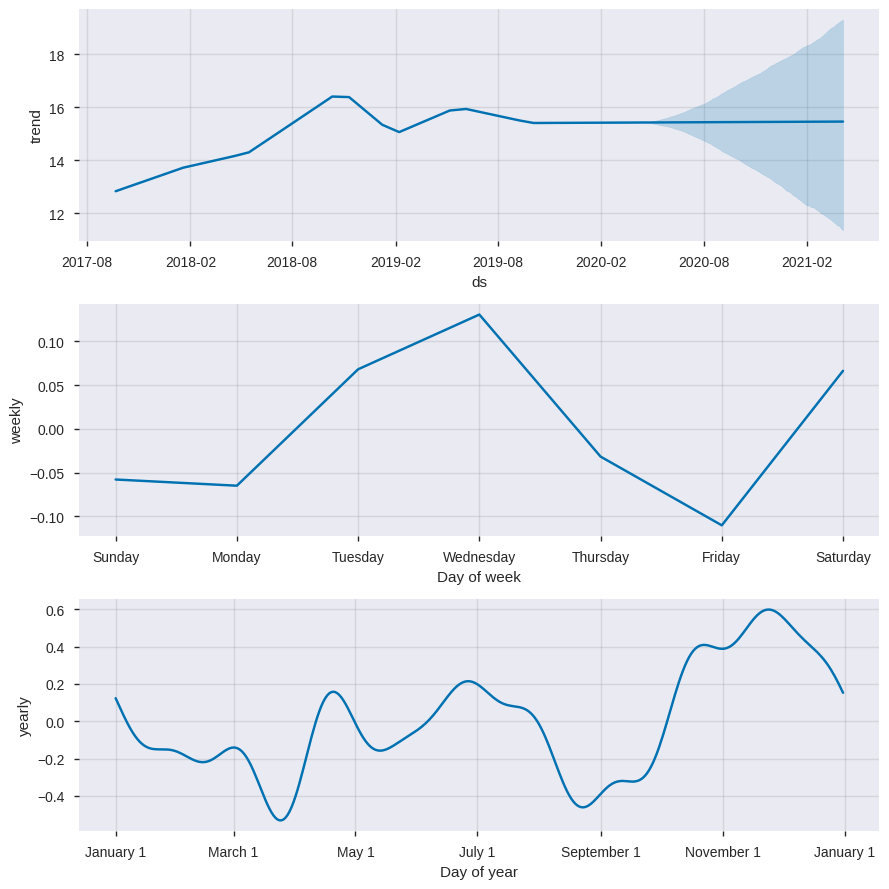

In [0]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)
fig2

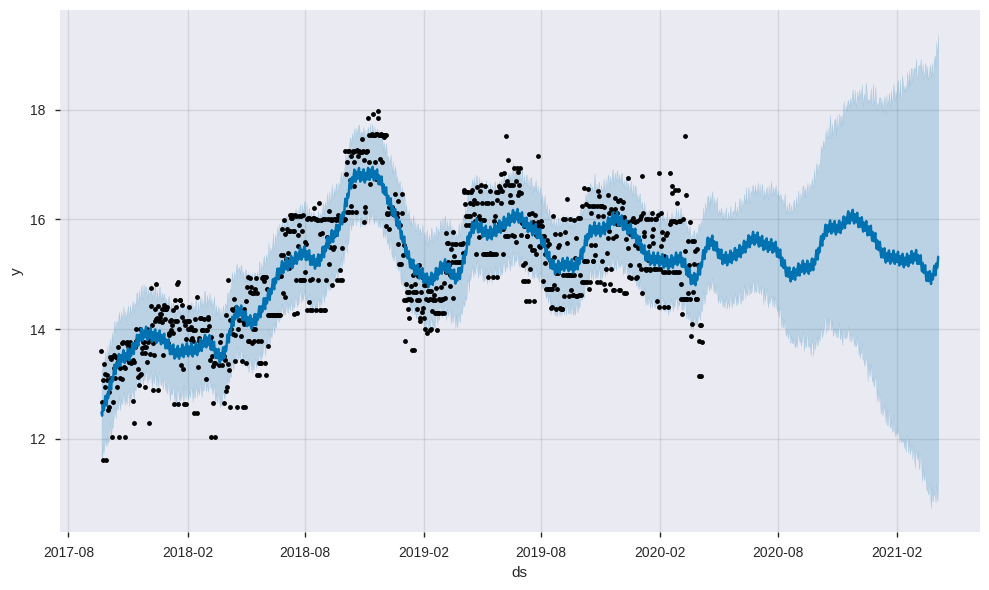

In [0]:
fig1